In [40]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [41]:
# Load datasets
ppg_data_combined = pd.read_excel('E:/dataset/PPG-BP/combined_dataset.xlsx')

ppg_data_combined['Sex(M/F)'] = ppg_data_combined['Sex(M/F)'].map({'Male': 1, 'Female': 0})

print(ppg_data_combined)

     Num.  subject_ID  Sex(M/F)  Age(year)  Height(cm)  Weight(kg)  \
0       1           2         0         45         152          63   
1       1           2         0         45         152          63   
2       1           2         0         45         152          63   
3       2           3         0         50         157          50   
4       2           3         0         50         157          50   
..    ...         ...       ...        ...         ...         ...   
652   218         418         1         25         173          63   
653   218         418         1         25         173          63   
654   219         419         1         24         175          58   
655   219         419         1         24         175          58   
656   219         419         1         24         175          58   

     Systolic Blood Pressure(mmHg)  Diastolic Blood Pressure(mmHg)  \
0                              161                              89   
1                  

In [42]:
num_subjects = ppg_data_combined['subject_ID'].nunique()
print(num_subjects)


219


In [43]:
ppg_data_combined.columns

Index(['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)',
       'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
       'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=2114)

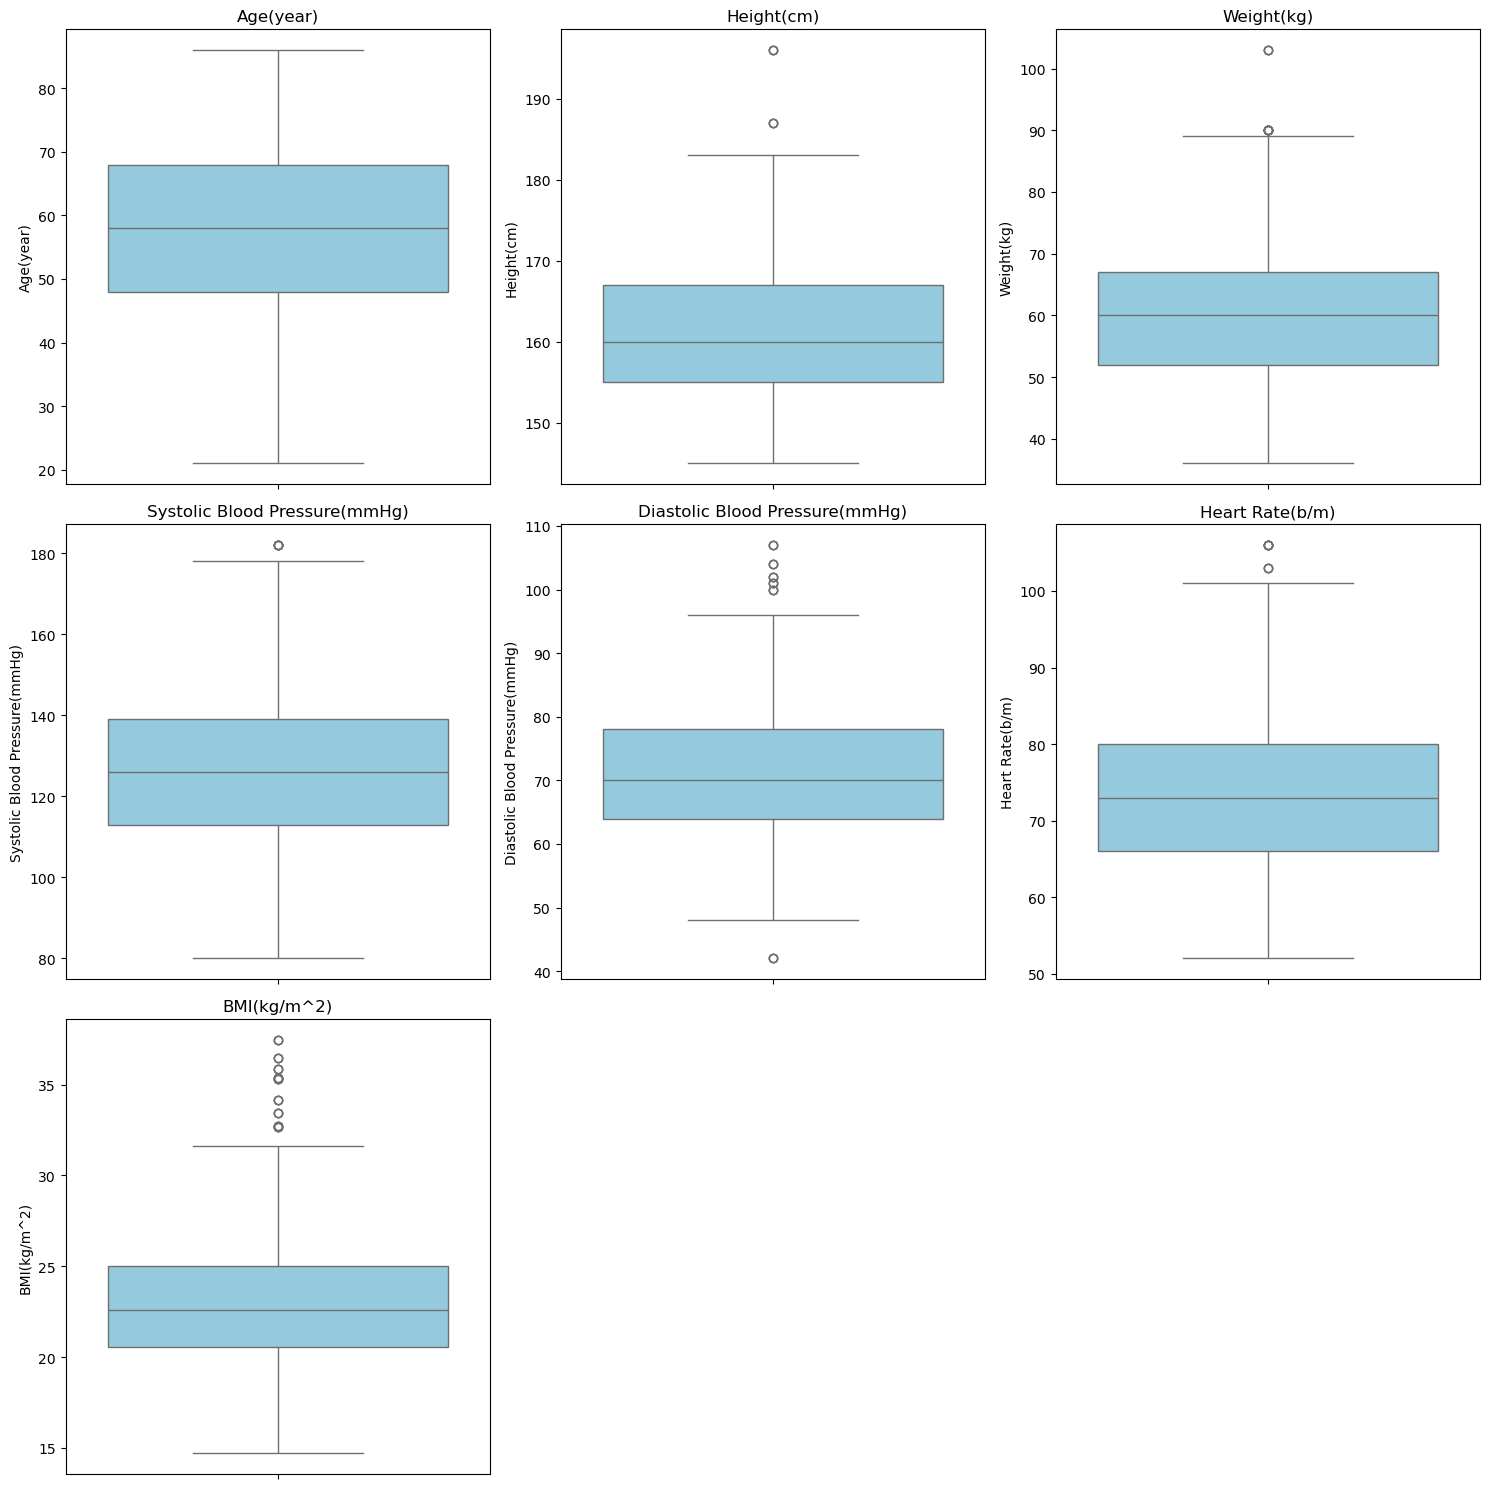

In [44]:
# Boxplot 시각화
plt.figure(figsize=(15, 15))

graph_features = ['Age(year)', 'Height(cm)', 'Weight(kg)', 'Systolic Blood Pressure(mmHg)', 
                  'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)']
for i, feature in enumerate(graph_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=ppg_data_combined[feature], color='skyblue')
    plt.title(feature)

plt.tight_layout()
plt.show()

In [45]:
ppg_data_combined.shape

(657, 2114)

In [47]:
data_systolic = ppg_data_combined["Systolic Blood Pressure(mmHg)"]
data_diastolic = ppg_data_combined["Diastolic Blood Pressure(mmHg)"]
data_sex = ppg_data_combined["Sex(M/F)"]
data_age = ppg_data_combined["Age(year)"]
data_height = ppg_data_combined["Height(cm)"]
data_weight = ppg_data_combined["Weight(kg)"]
data_hr = ppg_data_combined["Heart Rate(b/m)"]
data_bmi = ppg_data_combined["BMI(kg/m^2)"]

ppg_data = ppg_data_combined.iloc[:,14:]

data_personal = pd.concat([data_sex, data_age, data_height, data_weight, data_hr, data_bmi], axis=1)

In [48]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(data_personal)

# Transform the data
normalized_data = scaler.transform(data_personal)

In [49]:
# Convert back to a DataFrame (optional, if you need the result as a DataFrame)
normalized_df = pd.DataFrame(normalized_data, columns=data_personal.columns)

ppg_data = np.array(ppg_data)
data_personal = np.array(normalized_df)
print(ppg_data)
print(data_personal)

[[2438 2438 2438 ... 1827 1754 1754]
 [2201 2201 2171 ... 1997 1997 1997]
 [2019 2014 2014 ... 1924 1929 1929]
 ...
 [3083 3039 3071 ... 2422 2451 2379]
 [2426 2431 2446 ... 3103 3146 3151]
 [2691 2718 2743 ... 2611 2639 2623]]
[[0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 [0.         0.36923077 0.1372549  0.40298507 0.83333333 0.55232326]
 ...
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]
 [1.         0.04615385 0.58823529 0.32835821 0.24074074 0.18650234]]


In [50]:
# Assuming bp_data has columns 'systolic' and 'diastolic'
# Normalize blood pressure data
bp_data = np.array([data_systolic, data_diastolic]).T
print(bp_data)

[[161  89]
 [161  89]
 [161  89]
 ...
 [108  68]
 [108  68]
 [108  68]]


In [51]:
# Split the data into training and testing sets
X_train2100, X_test2100, y_train, y_test = train_test_split(ppg_data, bp_data, test_size=0.15, random_state=42)
X_train6, X_test6, y_train, y_test = train_test_split(data_personal, bp_data, test_size=0.15, random_state=42)

In [52]:
# PPG Signal (2100, 1)으로 변환
X_train2100 = np.reshape(X_train2100, (X_train2100.shape[0], X_train2100.shape[1], 1))
X_test2100 = np.reshape(X_test2100, (X_test2100.shape[0], X_test2100.shape[1], 1))

In [53]:
# Personal Data (6, 1)으로 변환
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))

In [54]:
print(X_test2100.shape)
print(X_test6.shape)

(99, 2100, 1)
(99, 6, 1)


In [63]:
input1 = Input(shape=(6, 1), name='Input1')

# 두 번째 입력: PPG Signal (2100, 1)
input2 = Input(shape=(2100, 1), name='Input2')

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 첫 번째 입력: Personal Data (6, 1)
input1 = Input(shape=(6, 1), name='Input1')
x1 = GRU(32, return_sequences=True, activation='relu')(input1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, return_sequences=True, activation='relu')(x1)
x1 = GRU(32, activation='relu')(x1)

# 두 번째 입력: PPG Signal (2100, 1)
input2 = Input(shape=(2100, 1), name='Input2')
x2 = GRU(64, return_sequences=True, activation='relu')(input2)
x2 = GRU(64, return_sequences=True, activation='relu')(x2)
x2 = GRU(64, activation='relu')(x2)

# 두 경로를 병합 (Concatenation)
merged = Concatenate()([x1, x2])

# Dense layers
x = Dense(64, activation='relu')(merged)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

# SBP와 DBP 예측 후 결합하여 반환 (선형 활성화 함수 사용)
output = Dense(2, activation='linear', name='BP')(x)

# 모델 정의
model = Model(inputs=[input1, input2], outputs=output)

# Adamax 옵티마이저 사용, 학습률 0.005로 설정
optimizer = Adamax(learning_rate=0.005)

# 모델 컴파일: 손실 함수로 MSE 사용
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# 모델 요약 출력
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input1 (InputLayer)           │ (None, 6, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_16 (GRU)                  │ (None, 6, 32)             │           3,360 │ Input1[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_17 (GRU)                  │ (None, 6, 32)             │           6,336 │ gru_16[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Input2 (InputLayer)           │ (None, 2100, 1)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_18 (GRU)                  │ (None, 6, 32)             │           6,336 │ gru_17[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_21 (GRU)                  │ (None, 2100, 64)          │          12,864 │ Input2[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_19 (GRU)                  │ (None, 6, 32)             │           6,336 │ gru_18[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_22 (GRU)                  │ (None, 2100, 64)          │          24,960 │ gru_21[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_20 (GRU)                  │ (None, 32)                │           6,336 │ gru_19[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_23 (GRU)                  │ (None, 64)                │          24,960 │ gru_22[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 96)                │               0 │ gru_20[0][0], gru_23[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 64)                │           6,208 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 32)                │           2,080 │ dense_23[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 16)                │             528 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 8)                 │             136 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ BP (Dense)                    │ (None, 2)                 │              18 │ dense_26[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 100,458 (392.41 KB)

 Trainable params: 100,458 (392.41 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# 콜백 함수 설정: 조기 종료(EarlyStopping) 및 최적 가중치 저장(ModelCheckpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [73]:
# 모델 훈련
history = model.fit(
    [X_train6, X_train2100], y_train,  # 훈련 데이터
    epochs=100,  # 총 500 에포크
    batch_size=128,  # 배치 크기 128
    validation_split=0.10,  # 훈련 데이터의 20%를 검증 데이터로 사용
    callbacks=[early_stopping]
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 122s 26s/step - loss: 10630.0625 - mse: 10630.0625 - val_loss: 10491.3740 - val_mse: 10491.3740
Epoch 2/100
2/4 ━━━━━━━━━━━━━━━━━━━━ 1:10 35s/step - loss: 10026.1250 - mse: 10026.1250

KeyboardInterrupt: 

In [ ]:
predicted_bp = model.predict([X_test6, X_test2100])
print(predicted_bp)

In [ ]:
# Systolic values
y_test_systolic = y_test[:, 0]
predicted_systolic = predicted_bp[:, 0]

In [ ]:
# Diastolic values
y_test_diastolic = y_test[:, 1]
predicted_diastolic = predicted_bp[:, 1]

In [ ]:
# Plotting actual vs. predicted Systolic Blood Pressure
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_systolic, predicted_systolic, label='Data Points', color='blue')
plt.plot([y_test_systolic.min(), y_test_systolic.max()], [predicted_systolic.min(), predicted_systolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Systolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Systolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Systolic BP', fontsize=16)
plt.legend()

In [ ]:
# Plotting actual vs. predicted Diastolic Blood Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_test_diastolic, predicted_diastolic, label='Data Points', color='red')
plt.plot([y_test_diastolic.min(), y_test_diastolic.max()], [predicted_diastolic.min(), predicted_diastolic.max()], 'k--', lw=4, label='Trend Line')
plt.xlabel('Actual Diastolic BP (mmHg)', fontsize=16)
plt.ylabel('Predicted Diastolic BP (mmHg)', fontsize=16)
plt.title('Actual vs. Predicted Diastolic BP', fontsize=16)
plt.legend()

In [ ]:
plt.tight_layout()
plt.savefig('PPG/SBP-DBP-prediction.png', dpi=300)
plt.show()

In [ ]:
# Bland-Altman Plot for Systolic Blood Pressure
mean_systolic = np.mean([y_test_systolic, predicted_systolic], axis=0)
diff_systolic = y_test_systolic - predicted_systolic
mean_diff_systolic = np.mean(diff_systolic)
std_diff_systolic = np.std(diff_systolic)
upper_limit_systolic = mean_diff_systolic + 1.96 * std_diff_systolic
lower_limit_systolic = mean_diff_systolic - 1.96 * std_diff_systolic

# Bland-Altman Plot for Diastolic Blood Pressure
mean_diastolic = np.mean([y_test_diastolic, predicted_diastolic], axis=0)
diff_diastolic = y_test_diastolic - predicted_diastolic
mean_diff_diastolic = np.mean(diff_diastolic)
std_diff_diastolic = np.std(diff_diastolic)
upper_limit_diastolic = mean_diff_diastolic + 1.96 * std_diff_diastolic
lower_limit_diastolic = mean_diff_diastolic - 1.96 * std_diff_diastolic

In [ ]:
plt.figure(figsize=(10, 8))
# Systolic Bland-Altman Plot
# plt.subplot(1, 2, 1)
plt.scatter(mean_systolic, diff_systolic, color='blue')
plt.axhline(mean_diff_systolic, color='red', linestyle='--')
plt.axhline(mean_diff_systolic + 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.axhline(mean_diff_systolic - 1.96 * std_diff_systolic, color='green', linestyle='--')
plt.text(x=max(mean_systolic), y=mean_diff_systolic, s=f'Mean: {mean_diff_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=upper_limit_systolic, s=f'Upper Limit: {upper_limit_systolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_systolic), y=lower_limit_systolic, s=f'Lower Limit: {lower_limit_systolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Systolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Systolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Systolic BP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-SBP.png', dpi=300)
plt.show()

In [ ]:
# Diastolic Bland-Altman Plot
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.scatter(mean_diastolic, diff_diastolic, color='red')
plt.axhline(mean_diff_diastolic, color='blue', linestyle='--')
plt.axhline(mean_diff_diastolic + 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.axhline(mean_diff_diastolic - 1.96 * std_diff_diastolic, color='green', linestyle='--')
plt.text(x=max(mean_diastolic), y=mean_diff_diastolic, s=f'Mean: {mean_diff_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=upper_limit_diastolic, s=f'Upper Limit: {upper_limit_diastolic:.2f}', va='bottom', ha='right', fontsize=16)
plt.text(x=max(mean_diastolic), y=lower_limit_diastolic, s=f'Lower Limit: {lower_limit_diastolic:.2f}', va='top', ha='right', fontsize=16)
plt.xlabel('Mean Diastolic BP (Actual and Predicted)', fontsize=16)
plt.ylabel('Difference Diastolic BP (Actual - Predicted)', fontsize=16)
plt.title('Bland-Altman Plot for Diastolic BP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Bland-Altman-Plot-DBP.png', dpi=300)
plt.show()

In [ ]:
# Calculate prediction errors
errors_systolic = y_test_systolic - predicted_systolic
errors_diastolic = y_test_diastolic - predicted_diastolic

# Create histograms
plt.figure(figsize=(10, 8))

# Histogram for Systolic Blood Pressure Errors
# plt.subplot(1, 2, 1)
plt.hist(errors_systolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('SBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real SBP and predicted SBP', fontsize=16)
plt.tight_layout()
plt.savefig('PPG/Prediction-errors-SBP.png', dpi=300)
plt.show()

In [ ]:
# Histogram for Diastolic Blood Pressure Errors
plt.figure(figsize=(10, 8))
# plt.subplot(1, 2, 2)
plt.hist(errors_diastolic, bins=50, color='gray', edgecolor='black')
plt.xlabel('DBP Prediction Errors (mmHg)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.title('Average of real DBP and predicted DBP', fontsize=16)

plt.tight_layout()
plt.savefig('PPG/Prediction-errors-DBP.png', dpi=300)
plt.show()

In [ ]:
# Calculate MAE
mae_systolic = np.mean(np.abs(errors_systolic))
mae_diastolic = np.mean(np.abs(errors_diastolic))

# Calculate MAPD
mapd_systolic = np.mean(np.abs(errors_systolic / y_test_systolic)) * 100
mapd_diastolic = np.mean(np.abs(errors_diastolic / y_test_diastolic)) * 100

# Calculate Cumulative Percentages (CP)
cp_systolic_5 = np.mean(np.abs(errors_systolic) <= 5) * 100
cp_systolic_10 = np.mean(np.abs(errors_systolic) <= 10) * 100
cp_systolic_15 = np.mean(np.abs(errors_systolic) <= 15) * 100
cp_diastolic_5 = np.mean(np.abs(errors_diastolic) <= 5) * 100
cp_diastolic_10 = np.mean(np.abs(errors_diastolic) <= 10) * 100
cp_diastolic_15 = np.mean(np.abs(errors_diastolic) <= 15) * 100

# Calculate ME
me_systolic = np.mean(errors_systolic)
me_diastolic = np.mean(errors_diastolic)

# Calculate SD
sd_systolic = np.std(errors_systolic)
sd_diastolic = np.std(errors_diastolic)

In [ ]:
# Printing results
print("Systolic BP:")
print(f"MAE: {mae_systolic:.3f} mmHg")
print(f"MAPD: {mapd_systolic:.3f}%")
print(f"CP within 5 mmHg: {cp_systolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_systolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_systolic_15:.3f}%")
print(f"ME: {me_systolic:.3f} mmHg")
print(f"SD: {sd_systolic:.3f} mmHg")

print("\nDiastolic BP:")
print(f"MAE: {mae_diastolic:.3f} mmHg")
print(f"MAPD: {mapd_diastolic:.3f}%")
print(f"CP within 5 mmHg: {cp_diastolic_5:.3f}%")
print(f"CP within 10 mmHg: {cp_diastolic_10:.3f}%")
print(f"CP within 15 mmHg: {cp_diastolic_15:.3f}%")
print(f"ME: {me_diastolic:.3f} mmHg")
print(f"SD: {sd_diastolic:.3f} mmHg")